### EXAMEN - Convocatoria 1 - Programación
Utilizar el conjunto de datos "dataset_exam.npy" para resolver el ejercicio. Tener en cuenta que la última columna corresponde a la clase.

#### 1) Partición de datos externa (1 punto)
Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42).
Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

In [1]:
# Cargamos los datos 
import numpy as np
path = "C:/Users/plane/OneDrive/Escritorio/COMPUTING SCIENCE/MASTER Inteligencia artificial/Examenes VIU/Examenes VIU/Aprendizaje Supervisado/2022/examen/dataset_exam.npy"
data = np.load(path, allow_pickle=True)

Realizar una partición externa de tipo hold-out seleccionando un 20% de los datos para test (fijar una semilla en 42)

> Importo train_test_split de sklearn.model_selection

In [2]:
from sklearn.model_selection import train_test_split

> Separo la clase del resto del conjunto

In [3]:

X = data[:, :-1]
y = data[:, -1]

> Compruebo que he realizado bien la separación de X

In [4]:
print(f'Observando X: {X[0]}')

Observando X: [0.         4.         1.         4.         2.         9.04481012
 8.2603626  7.37490176]


> Compruebo que he realizado bien la separación de Y

In [5]:
print(f'Observando y: {y[:10]}')

Observando y: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


> Hago la partición hold-out separando el 20% para test que se pide en el enunciado

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[:, :-1], data[:, -1], test_size=0.2, random_state=42)

Comprobad si los datos, tanto de train como de test, están más o menos balanceados.

> Lo compruebo revisando cuantas muestras han ido a train y test

In [7]:
unique_train, counts_train = np.unique(y_train, return_counts = True)
unique_test, counts_test = np.unique(y_test, return_counts = True)
print('Train: ', 'clases:', unique_train, ' ocurrencias: ', counts_train)
print('Test: ', 'clases:', unique_test, ' ocurrencias: ', counts_test)

Train:  clases: [0. 1.]  ocurrencias:  [195 198]
Test:  clases: [0. 1.]  ocurrencias:  [51 48]


#### 2) Estandarización de los datos de train y test (1 punto)
Utilizar el método StandardScaler().

> Importo la librería desde sklearn.preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

> Creo el estandarizador

In [9]:
scaler = StandardScaler()

> Estandarizo mis conjuntos de train y el test únicamente con el transform

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> Compruebo si he estandarizado correctamente

In [11]:
print(f'Estandarización de train: {X_test_scaled[0]}')
print(f'Estandarización de test: {X_test_scaled[0]}')

Estandarización de train: [-0.53714485  0.63354944 -0.37232487 -1.908315    2.67719761  0.05934713
  0.34463955 -0.04781824]
Estandarización de test: [-0.53714485  0.63354944 -0.37232487 -1.908315    2.67719761  0.05934713
  0.34463955 -0.04781824]


#### 3) Selección de atributos en train y test (1 punto)
Aplicar el método de mutual information para clasificación seleccionando un percentile=90. (Recordad la función "SelectPercentile")

> Importo SelectPercentile y mutual_info_classif de sklearn.feature_selection

In [12]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

> Selecciono el peprcentil 90 y se lo aplico a los conjuntos de train

In [13]:
selector = SelectPercentile(mutual_info_classif, percentile = 90)
selector.fit(X_train_scaled, y_train)

SelectPercentile(percentile=90,
                 score_func=<function mutual_info_classif at 0x00000121E960A8C0>)

> Selecciono las características más importantes de train y test

In [14]:
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

> Quiero saber que esta pasando

In [15]:
print(f'Características train: {X_train_sel[0]}')
print(f'Características test: {X_test_sel[0]}')

Características train: [-0.53714485 -0.41701989 -0.42469918  0.88784615 -0.54017298 -1.96779643
 -2.17643457]
Características test: [-0.53714485  0.63354944 -1.908315    2.67719761  0.05934713  0.34463955
 -0.04781824]


#### 4) Comparación de modelos de clasificación mediante validación cruzada (3 puntos)
Instrucciones:

- Aplicar una validación cruzada interna de K=5 bolsas para optimizar y comparar la capacidad predictiva de los siguientes modelos: Regresión Logística y Support Vector Machine.
- La optimización de hiperparámetros debe realizarse de manera automática. (Recordad la función "GridSearchCV").
- La comparación debe realizarse únicamente en términos de exactitud proporcionando resultados de media +- desviación estándar.

> Importo los algoritmos de sklearn.linear_model (regresión logística) y sklearn.svm (suport vector machine)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

> Defino los modelos

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

> Defino los hiperparámetros

In [18]:
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

> Importo GridSearchCV de sklearn.model_selection para hacer la optimización de manera automática

In [19]:
from sklearn.model_selection import GridSearchCV

> En este momento ya puedo hacer la validación cruzada interna

In [20]:
results = {}
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    clf = GridSearchCV(model, param_grid, cv=5)
    clf.fit(X_train_sel, y_train)
    mean_score = clf.cv_results_["mean_test_score"][clf.best_index_]
    std_score = clf.cv_results_["std_test_score"][clf.best_index_]
    results[model_name] = (mean_score, std_score)

> Muestro los resultados que pide el enunciado (media y desviación estándar)

In [21]:
for model_name, (mean_score, std_score) in results.items():
    print(f"{model_name}: {mean_score:.3f} +- {std_score:.3f}")

Logistic Regression: 0.687 +- 0.043
SVM: 0.776 +- 0.056


#### 5) Evaluación de los modelos sobre el conjunto de test (2.5 puntos)
- Entrenar los modelos anteriores utilizando todos los datos de entrenamiento.
- Evaluar su rendimiento sobre el conjunto de test mostrando una tabla de resultados tal que:
 * Las filas serán: Precisión, Sensibilidad, F-score, Exactitud y AUC
 * Las columnas serán: LOGR y SVM

> No se porque no puedo sacar las métricas como lo hacemos en clase, las voy a importar directamente

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

> Entreno el modelo de LogisticRegression

In [23]:
logreg = LogisticRegression(C=1)
logreg.fit(X_train_sel, y_train)

LogisticRegression(C=1)

> Entreno el modelo de SVC

In [24]:
svm = SVC(C=10, kernel="rbf")
svm.fit(X_train_sel, y_train)

SVC(C=10)

> Hago la predicción sobre el test

In [25]:
y_pred_logreg = logreg.predict(X_test_sel)
y_pred_svm = svm.predict(X_test_sel)

> Creo el diccionario de métricas

In [26]:
metrics = {
    "Accuracy": accuracy_score,
    "Precision": precision_score,
    "Recall": recall_score,
    "F-score": f1_score,
    "AUC": roc_auc_score
}

> Saco los resultados (el center es para darle estilo a la tabla, más sencillo que el tabulate)

In [27]:
results = {}
for metric_name, metric_fn in metrics.items():
    results[metric_name] = {}
    for model_name, y_pred in zip(["LOGR", "SVM"], [y_pred_logreg, y_pred_svm]):
        results[metric_name][model_name] = metric_fn(y_test, y_pred)


print("\tLOGR\tSVM")
for metric_name, model_scores in results.items():
    row = [f"{model_scores[model_name]:.3f}".center(10) for model_name in model_scores.keys()]
    print(f"{metric_name.center(10)}{''.join(row)}")

	LOGR	SVM
 Accuracy   0.636     0.758   
Precision   0.603     0.740   
  Recall    0.729     0.771   
 F-score    0.660     0.755   
   AUC      0.639     0.758   


#### 6) Visualización de resultados (1 punto)
- Mostrar la matriz de confusión
- Mostrar en una única figura la comparación de las curvas ROC obtenidas por cada modelo. (Recordad que SVM requiere un parámetro específico en su llamada para poder calcular la curva ROC). 

> Importo la librería de la matriz de confusión de sklearn.metrics 

In [28]:
from sklearn.metrics import confusion_matrix

> La matriz de confusión de la rergesión logística

In [29]:
print("Matriz de confusión de Regresión Logística:")
print(confusion_matrix(y_test, y_pred_logreg))

Matriz de confusión de Regresión Logística:
[[28 23]
 [13 35]]


> La matriz de confusión de SVM

In [30]:
print("Matriz de confusión de SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Matriz de confusión de SVM:
[[38 13]
 [11 37]]


> Importo matplotlib para el plot y la curva roc de sklearn.metrics

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

> Calculo la curva para la regresión logística

In [32]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_sel)[:, 1])

> Calculo la curva para SVM

In [33]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test_sel))

> Hago el plot

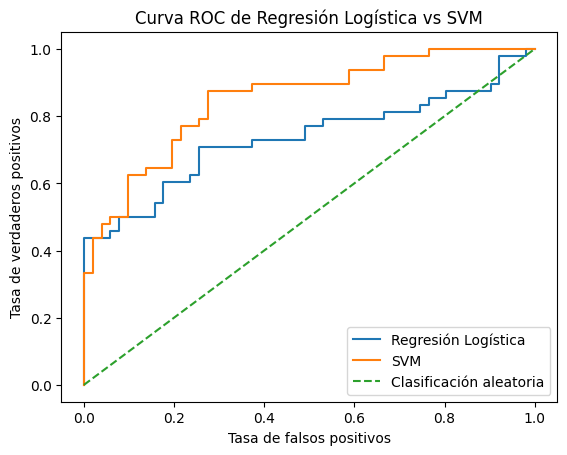

In [34]:
plt.plot(fpr_logreg, tpr_logreg, label="Regresión Logística")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot([0, 1], [0, 1], linestyle="--", label="Clasificación aleatoria")
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC de Regresión Logística vs SVM")
plt.legend()
plt.show()

#### 7) Interpretación de resultados (0.5 puntos)
* Justifica brevemente cuál de los dos modelos utilizarías para ponerlo en producción

En producción pondría el SVM porque obtiene métricas mas aceptables que el SVM y haciendo uso de la curva ROC podemos observar que presenta una mejor curva